In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [7]:
# Function to compute discrimination statistic d(θ)
def compute_discrimination_statistic(df, model):
    """Computes d(θ) as the difference in mean prediction errors between T=0 and T=1."""
    group_A = df[df['T'] == 0]  # Group A (T=0)
    group_B = df[df['T'] == 1]  # Group B (T=1)
    
    # Predictions for each group
    y_A_pred = model.predict(group_A[['X']])
    y_B_pred = model.predict(group_B[['X']])

    # True values
    y_A_true = group_A['Y']
    y_B_true = group_B['Y']

    # Compute mean error for each group
    mean_A = np.mean(y_A_pred - y_A_true)
    mean_B = np.mean(y_B_pred - y_B_true)

    # Compute discrimination statistic
    d_theta = mean_A - mean_B
    return d_theta

In [8]:
# Function to train models and compute discrimination statistics
def train_models_and_compute_statistics(data):
    results = []  # Store results for all datasets
    
    # Loop through each dataset (10,000 in total)
    for dataset_id in data['Dataset_ID'].unique():
        df = data[data['Dataset_ID'] == dataset_id]  # Get the subset of data for this dataset

        # Prepare X (feature) and Y (target)
        X = df[['X']]
        y = df['Y']

        # Train Least Squares Linear Regression
        model = LinearRegression()
        model.fit(X, y)  # Fit the model using Least Squares

        # Extract coefficients
        theta_0 = model.intercept_  # Intercept
        theta_1 = model.coef_[0]    # Slope

        # Compute discrimination statistic d(θ)
        d_theta = compute_discrimination_statistic(df, model)

        # Store results
        results.append({
            'Dataset_ID': dataset_id,
            'd(θ)': d_theta,
            'θ0': theta_0,
            'θ1': theta_1
        })

    # Convert results into DataFrame
    results_df = pd.DataFrame(results)
    return results_df

In [ ]:
# Load the synthetic data
data = pd.read_csv('all_synthetic_data2.csv')

In [ ]:
# Train models and compute discrimination statistics
#no need to run
discrimination_results = train_models_and_compute_statistics(data)

In [ ]:
# Save results to a CSV file
#no need to run
discrimination_results.to_csv("discrimination_statistics_with_coefficients.csv", index=False)


In [ ]:
discrimination_results = pd.read_csv('discrimination_statistics_with_coefficients.csv')

In [15]:
print(discrimination_results.head())

   Dataset_ID      d(θ)        θ0        θ1
0           1 -0.752393 -0.018103  0.660522
1           2 -0.671935 -0.002877  0.663384
2           3 -0.732189  0.056119  0.685151
3           4 -0.631806 -0.051600  0.672558
4           5 -0.839397 -0.020151  0.648863


In [16]:
# Compute the mean discrimination statistic
mean_d_theta = discrimination_results['d(θ)'].mean()

# Print the result
print(f"Mean Discrimination Statistic: {mean_d_theta}")

Mean Discrimination Statistic: -0.6660712085643329


In [18]:
random_samples2 = data.sample(n=5000, random_state=42)
x_random = random_samples2['X']
y_random = random_samples2['Y']

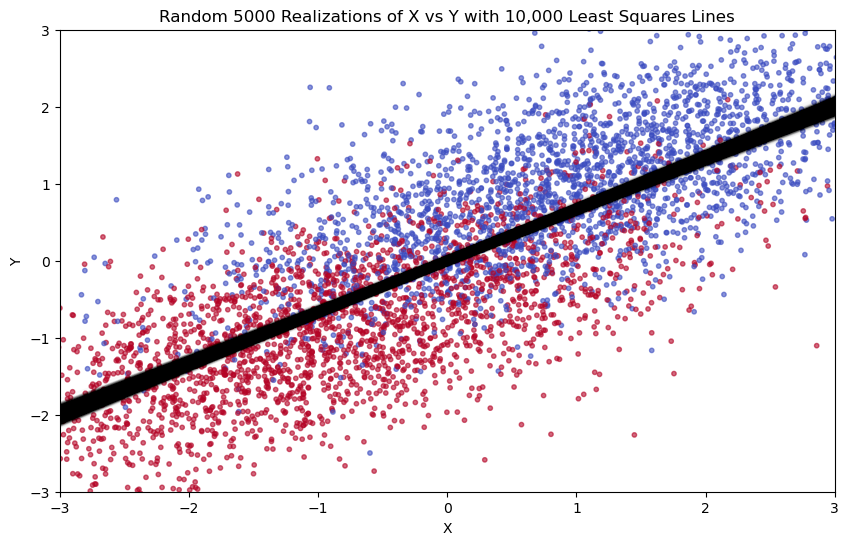

In [19]:
plt.figure(figsize=(10, 6)) 

# Scatter plot with colors based on the 'T' column
plt.scatter(
    random_samples2['X'], 
    random_samples2['Y'], 
    c=random_samples2['T'],  
    cmap='coolwarm',         
    alpha=0.6, 
    s=10
)

for i in range(10000):
    
    theta_0 = discrimination_results.iloc[i]['θ0']
    theta_1 = discrimination_results.iloc[i]['θ1']
    
    
    x_line = np.linspace(min(random_samples2['X']), max(random_samples2['X']), 1000)
    
    
    y_line = theta_1 * x_line + theta_0
    
  
    plt.plot(x_line, y_line, color='black', alpha=0.02)  # Transparency for the lines

plt.title('Random 5000 Realizations of X vs Y with 10,000 Least Squares Lines')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-3, 3)


plt.show()